# Simulação de análise para expansão da Airbnb em New York

---

# 1\. Introdução

[Airbnb, Inc.](https://www.airbnb.com.br/) é uma empresa americana que opera um mercado online para estadias e experiências em casas de família de curto e longo prazo. A empresa atua como corretora e cobra uma comissão por cada reserva.

# 2\. Contexto

### O problema de negócio:

Depois de uma boa preparação, você prestou o processo seletivo para trabalhar na renomada empresa de aluguel de espaços chamada **Airbnb**. Após a primeira semana de recepção, você se junta ao time de **Cientistas de Dados** da empresa com foco em **expansão da empresa, na cidade de Nova York**, Estados Unidos.

Esse **projeto de expansão é muito importante para o Airbnb**, mas também é muito arriscado. Qualquer decisão errada por parte do CEO
pode levar a empresa a ter um prejuízo enorme.

Para diminuir o risco desse projeto, o **seu chefe pediu para você auxiliar o CEO da empresa**, utilizando dados para responder algumas perguntas que o ajudarão a **tomar melhores decisões comerciais e de marketing**.

# 3\. Perguntas e Respostas

As perguntas e os pedidos recebidos estão apresentados a seguir e as respostas estão incluídas nos respectivos itens.<br>
Algumas respostas podem ser observadas diretamente em suas tabelas e mapas.

### 3.1\. Qual o valor médio do aluguel na cidade de Nova York?

In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import plotly.express as px
import os

In [2]:
dataset = '/kaggle/input/ab-nyc-2019-csv/'

for dirname, _, filenames in os.walk(dataset):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ab-nyc-2019-csv/AB_NYC_2019.csv


In [3]:
data = pd.read_csv('/kaggle/input/ab-nyc-2019-csv/AB_NYC_2019.csv')

In [4]:
# selecionar a coluna price
price = data.loc[:, 'price']

# calcular o valor medio do preco
valor_medio = np.mean(price)

# mostrar os valores
print(f'O valor médio do aluguel na cidade de Nova York é: {valor_medio}')

O valor médio do aluguel na cidade de Nova York é: 152.7206871868289


### 3.2\. Quais os nomes das regiões que existem na cidade de Nova York?

In [5]:
# selecionar a coluna região
regioes = data.loc[:, 'neighbourhood_group']

# selecionar a coluna neighbourhood_group
regioes_unicas = pd.unique(regioes)
print(f'Os nomes das regiões que existem na cidade de Nova York são: {regioes_unicas}')

Os nomes das regiões que existem na cidade de Nova York são: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


### 3.3\. Qual o valor do aluguel diário mais caro da cidade de Nova York?

In [6]:
# selecionar a coluna price
price = data.loc[:, 'price']

# selecionar a coluna região
price = np.max(price)
print(f'O valor do aluguel diário mais caro da cidade de Nova York é: {price}')

O valor do aluguel diário mais caro da cidade de Nova York é: 10000


### 3.4\. Quais são as categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York?

In [7]:
# selecionar o tipo de sala
room_type = data.loc[:, 'room_type']

# mostrar os valores únicos
room_type_unique = np.unique(room_type)

# mostrar os valores
print(f'As categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York são: {room_type_unique}')

As categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York são: ['Entire home/apt' 'Private room' 'Shared room']


### 3.5\. Quantos usuários (Hosts) únicos cadastrados existem dentro da base de dados da cidade de Nova York?

In [8]:
# selecionar a coluna host id
host_id = data.loc[:, 'host_id']

# selecionar a coluna neighbourhood_group
host_id_unique = np.unique(host_id)
len(host_id_unique)
print('O número de usuários únicos existentes dentro da base de dados da cidade de Nova York é:')
len(host_id_unique)

O número de usuários únicos existentes dentro da base de dados da cidade de Nova York é:


37457

### 3.6\. Como é a variação do preços dos imóveis em NY?

In [9]:
# selecionar a coluna price
price = data.loc[:, 'price']

# calcular o desvio padrão
desvio_padrao = np.std(price)
print('A variação dos preços dos imóveis em NY em relação à média é de: ')
desvio_padrao

A variação dos preços dos imóveis em NY em relação à média é de: 


240.15171391941718

### 3.7\. Existem mais imóveis baratos ou caros?

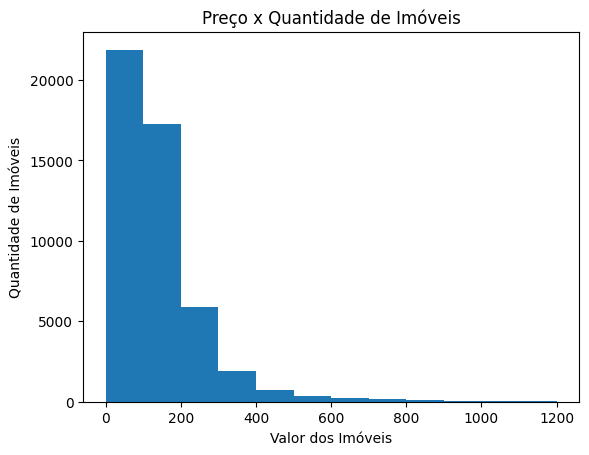

In [10]:
# selecionar a coluna price e filtrar linhas
linhas = data.loc[:, 'price'] < 1250
price = data.loc[linhas, 'price']

# desenhar o histograma
plt.hist( price, bins=12);
plt.title('Preço x Quantidade de Imóveis');
plt.xlabel('Valor dos Imóveis');
plt.ylabel('Quantidade de Imóveis');

Existem mais de 20.000 imóveis com o valor de aluguel até U$100. Ou seja, existe uma concentração de imóveis nos valores baixos de aluguel o que caracteriza a maioria como sendo imóveis mais baratos.

### 3.8\. Qual a distribuição do número de reviews? Existem imóveis com muitos e outros com poucos reviews?

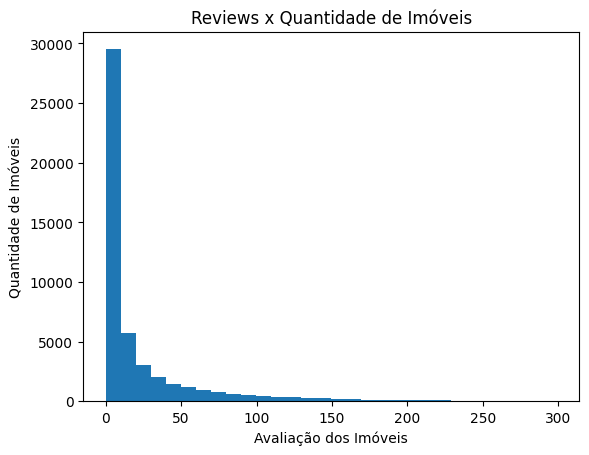

In [11]:
# selecionar a coluna price e filtrar linhas
linhas = data.loc[:, 'number_of_reviews'] < 300
number_reviews = data.loc[linhas, 'number_of_reviews']

# desenhar o histograma
plt.hist(number_reviews, bins=30);
plt.title('Reviews x Quantidade de Imóveis');
plt.xlabel('Avaliação dos Imóveis');
plt.ylabel('Quantidade de Imóveis');

Existem quase 30.000 imóveis com até 10 reviews. Ou seja, existem muitos imóveis com poucas reviews.

### 3.9\. Qual é o valor do aluguel (diária) mais caro de cada região da base de dados de NY?

In [12]:
# Selecionando as linhas e colunas
colunas = ['price', 'neighbourhood_group']
colunas_groupby = ['neighbourhood_group']

# Criando os segmentos
data_plot = data.loc[:, colunas].groupby(colunas_groupby).max().reset_index()

# Desenhando o gráfico
px.bar(data_plot, x='neighbourhood_group', y='price',
      labels={'neighbourhood_group': 'Bairro',
              'price': 'Valor do Aluguel'
    },
    title='Aluguel mais Caro por Região')

Os valores mais caros de cada região são:<br>
Brooklyn, Manhattan e Queens = 10,000<br>
Staten Island = 5,000<br>
Bronx = 2,500

### 3.10\. Conseguimos saber onde estão localizados os imóveis com o valor do aluguel mais caro em NY?

In [13]:
# Selecionando linhas e colunas
colunas = ['price', 'neighbourhood_group', 'latitude', 'longitude']
colunas_groupby = ['neighbourhood_group']

# Criando os segmentos
data_plot = data.loc[:, colunas].groupby(colunas_groupby).max().reset_index()

# Criando a área do mapa
f = folium.Figure(width=1024, height=768)

# Desenhando o mapa
map = folium.Map(
location=[data_plot['latitude'].mean(),
data_plot['longitude'].mean()],
zoom_start=14,
control_scale=True
)

# Adicionando os pinos nos mapas
for index, location_info in data_plot.iterrows():
    folium.Marker([location_info['latitude'],
                   location_info['longitude']],
                  popup=location_info['neighbourhood_group']).add_to (map)

# Mostrando o mapa
map

### 3.11\. Conseguimos saber onde estão localizados os imóveis pelo seu tipo?

In [14]:
# Selecionando linhas aleatoriamente e colunas
colunas = ['neighbourhood_group', 'room_type', 'latitude', 'longitude']
data_plot = data.loc[:, colunas].sample(100)

# Criando uma nova coluna chamada 'color'
data_plot.loc[:, 'color'] = 'NA'

# Selecionando as linhas do segmento
linhas_private_room = data_plot.loc[:, 'room_type'] == 'Private room'
linhas_entire_apt = data_plot.loc[:, 'room_type'] == 'Entire home/apt'
linhas_shared_room = data_plot.loc[:, 'room_type'] == 'Shared room'

# Colocando as cores para cada segmento
data_plot.loc[linhas_private_room, 'color'] = 'darkgreen'
data_plot.loc[linhas_entire_apt, 'color'] = 'darkred'
data_plot.loc[linhas_shared_room, 'color'] = 'purple'

# Criando a área do mapa
map = folium.Map()

# Adicionando os pins nos mapas
for index, location_info in data_plot.iterrows():
    folium.Marker(
        [location_info['latitude'], location_info['longitude']],
        popup=location_info[['neighbourhood_group', 'room_type']],
        icon=folium.Icon( color=location_info['color'] )
    ).add_to( map)
    
# Exibindo o mapa
map

Os imóveis estão separados por cores. Foi considerado uma amostra com 100 exemplares de imóveis.

### 3.12\. Qual a média de preço por região?

In [15]:
# selecionar colunas
colunas = ['price', 'neighbourhood_group']
coluna_groupby = 'neighbourhood_group'

# calcular a media por regiao
data.loc[:, colunas].groupby(coluna_groupby).mean().reset_index()

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


### 3.13\. Qual o maior valor do aluguel por bairro e por tipo de quarto?

In [16]:
# selecionar colunas
colunas = ['price', 'neighbourhood', 'room_type']
colunas_groupby = ['neighbourhood', 'room_type']

# calcular max do preço do aluguel por bairro e tipo de quarto
data.loc[:, colunas].groupby(colunas_groupby).max().reset_index()

,neighbourhood,room_type,price
0,Allerton,Entire home/apt,450
1,Allerton,Private room,142
2,Arden Heights,Entire home/apt,83
3,Arden Heights,Private room,41
4,Arrochar,Entire home/apt,625
...,...,...,...
535,Woodlawn,Shared room,70
536,Woodrow,Entire home/apt,700
537,Woodside,Entire home/apt,500
538,Woodside,Private room,475


### 3.14\. Qual o menor valor de latitude por região?

In [17]:
# selecionar colunas
colunas = ['latitude', 'neighbourhood_group']
colunas_groupby = ['neighbourhood_group']

# calcular min das latitudes por regiao
data.loc[:, colunas].groupby(colunas_groupby).min().reset_index()

,neighbourhood_group,latitude
0,Bronx,40.80011
1,Brooklyn,40.57115
2,Manhattan,40.70234
3,Queens,40.56546
4,Staten Island,40.49979


### 3.15\. Faça um histograma somente com os proprietários que possuem mais de um imóvel listado na base de dados de NY

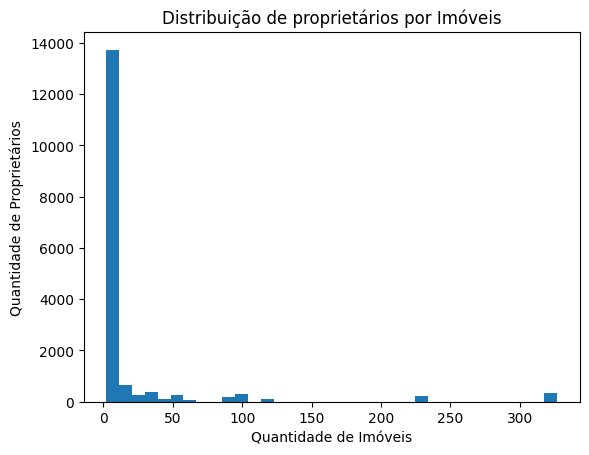

In [18]:
# selecionar colunas
colunas = ['host_id', 'calculated_host_listings_count']

# selecionar linhas com prorpietarios com mais de 1 imovel
linhas = data.loc[:, 'calculated_host_listings_count'] > 1

# selecionar dados que vao entrar no histograma
data_plot = data.loc[linhas, 'calculated_host_listings_count']

# fazer histograma
plt.hist(data_plot, bins=35);
plt.title('Distribuição de proprietários por Imóveis');
plt.xlabel('Quantidade de Imóveis');
plt.ylabel('Quantidade de Proprietários');


### 3.16\. Desenhe um mapa com os imóveis mais baratos por região.

In [19]:
# selecionar colunas
colunas = ['price', 'neighbourhood_group', 'latitude', 'longitude']
colunas_groupby = ['neighbourhood_group']

# criar os segmentos
data_plot = data.loc[:, colunas].groupby(colunas_groupby).min().reset_index()

# criar a área do mapa
# f = folium.Figure (width=1024, height=768)

# desenhar o mapa
map = folium.Map()

# adicionar os pinos nos mapas
for index, location_info in data_plot.iterrows():
  folium.Marker([location_info['latitude'],
  location_info['longitude']],
  popup=location_info['neighbourhood_group']).add_to(map)

# mostrar o mapa
map

### 3.17\. Desenhe um mapa com os imóveis que possuem o maior número de avaliações por região.

In [20]:
# selecionar colunas
colunas = ['number_of_reviews', 'neighbourhood_group', 'latitude', 'longitude']
colunas_groupby = ['neighbourhood_group']

# criar os segmentos
data_plot = data.loc[:, colunas].groupby(colunas_groupby).max().reset_index()

# Desenhar o mapa
map = folium.Map()

# adicionar os pinos nos mapas
for index, location_info in data_plot.iterrows():
  folium.Marker([location_info['latitude'],
  location_info['longitude']],
  popup=location_info['neighbourhood_group']).add_to(map)

# mostrar o mapa
map

### 3.18\. Desenhe um mapa somente com 100 imóveis do tipo “private room” escolhidos aleatoriamente.

In [21]:
# selecionar colunas
colunas = ['room_type', 'latitude', 'longitude']

# selecionar linhas do tipo 'private room'
linhas_private_room = data.loc[:, 'room_type'] == 'Private room'

# selecionar dados para o mapa
data_plot = data.loc[linhas_private_room, colunas].sample(100)

# Desenhar o mapa
map = folium.Map(#location=[data_plot['latitude'].mean(), data_plot['longitude'].mean()], zoom_start=14, control_scale=True
                )

# adicionar os pinos nos mapas
for index, location_info in data_plot.iterrows():
  folium.Marker([location_info['latitude'],
  location_info['longitude']],
  popup=location_info['room_type']).add_to(map)

# mostrar o mapa
map


### 3.19\. Desenhe um mapa somente com 100 imóveis do tipo “shared room” escolhidos aleatoriamente.

In [22]:
# selecionar colunas
colunas = ['room_type', 'latitude', 'longitude']

# selecionar linhas do tipo 'shared room'
linhas_shared_room = data.loc[:, 'room_type'] == 'Shared room'

# selecionar dados para o mapa
data_plot = data.loc[linhas_shared_room, colunas].sample(100)

# Desenhar o mapa
map = folium.Map()

# adicionar os pinos nos mapas
for index, location_info in data_plot.iterrows():
  folium.Marker([location_info['latitude'],
  location_info['longitude']],
  popup=location_info['room_type']).add_to(map)

# mostrar o mapa
map